<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_%ED%8F%AC%EC%95%84%EC%86%A1%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ed%8f%ac%ec%95%84%ec%86%a1%eb%b6%84%ed%8f%ac-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

사용할 모듈 포함문

In [1]:
import scipy as sp
from scipy import stats
from scipy.stats import expon #지수분포
from scipy.stats import poisson #포아송분포
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 포아송분포와 지수분포

포아송분포는 단위 시간 내에 사건이 발생할 횟수의 분포이다.

지수분포는 다음 사건이 일어날 때까지 대기시간의 분포이다. (전제 조건이 사건 분포가 포아송분포를 따를 때)

## 포아송분포

단위 시간 내에 어떤 사건이 발생할 횟수의 분포

이산 확률 분포입니다.

- 포아송분포의 전제 조건

발생한 어떤 사건은 다른 시간 혹은 공간에서 발생한 사건과 서로 독립이다.

단위 시간이나 단위 공간에서 발생한 평균 발생 횟수는 일정하다.

매우 짧은 시간 혹은 매우 작은 공간에서 두 개 이상의 사건이 발생할 확률은 0에 가깝다.



- 포아송분포 샘플 생성

A제품은 하루에 5개의 불량이 나온다고 한다. 이에 관한 100일간의 샘플을 생성하시오.

In [78]:
y = poisson.rvs(mu=5,size=100)
print(y)

[ 6  7  4  5  3  3  3  3  7  5  6  2  4  5  1  2  6  3  6  7  4  8  6  3
  4  5  3  3  3  3  2  7  6  3  7  2  2  4  5  6  4  3  6  7  9  9  7  2
  6  5  8  7  6  4  6  3  4  4  5  4  5  7  3  5  8  6  2 11  7  4  5  7
  9  3  8  8  4  5  4  5  2  7  4 10  4  2  8  5  3  2  9  4  8  8  8  6
  7  4  9  3]


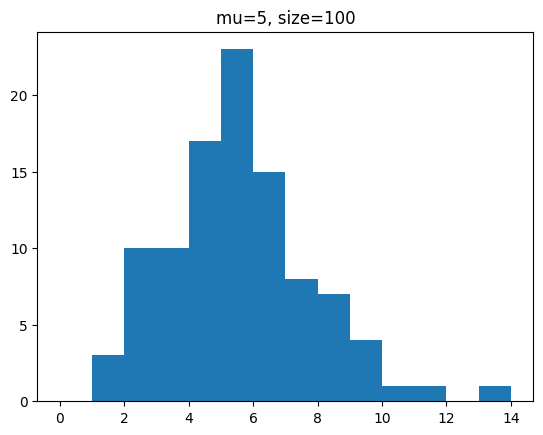

In [12]:
plt.hist(y,bins=range(0,15))
plt.title('mu=5, size=100')
plt.show()

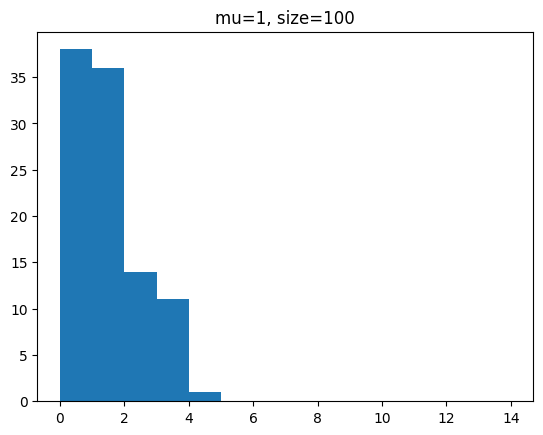

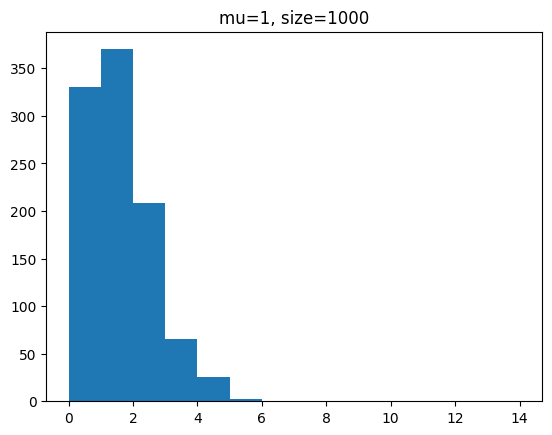

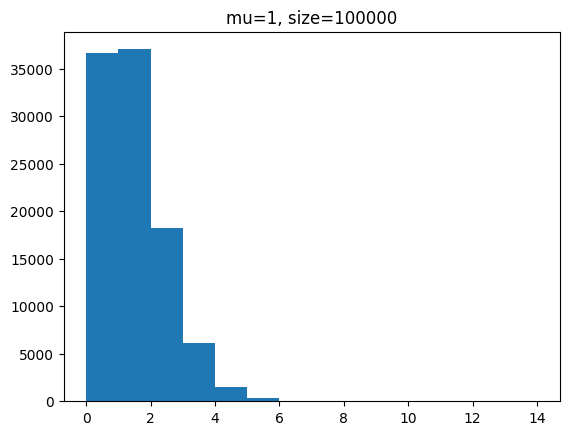

In [16]:
for s in [100,1000,100000]:
  y = poisson.rvs(mu=1,size=s)
  plt.hist(y,bins=range(0,15))
  plt.title(f'mu=1, size={s}')
  plt.show()

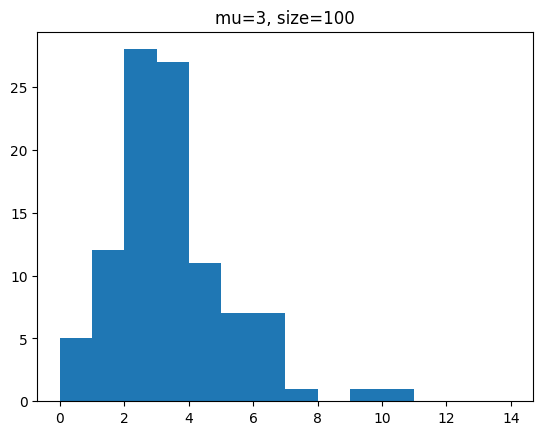

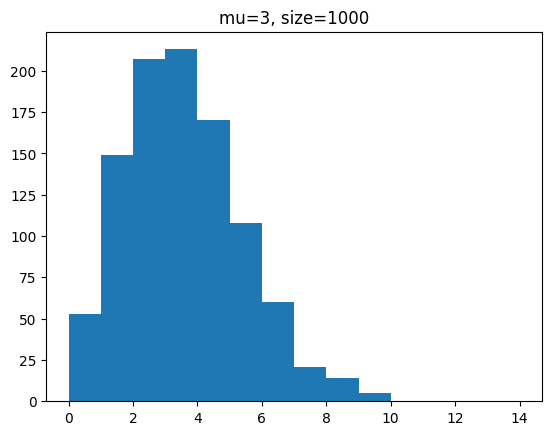

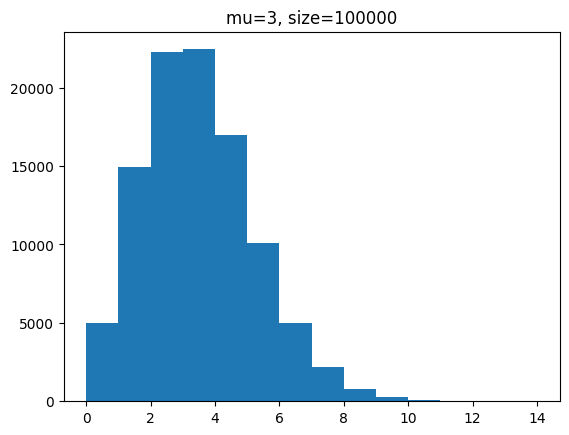

In [15]:
for s in [100,1000,100000]:
  y = poisson.rvs(mu=3,size=s)
  plt.hist(y,bins=range(0,15))
  plt.title(f'mu=3, size={s}')
  plt.show()

- 포아송분포 확률 질량 함수

단위 시간에 사건 발생 횟수가 1, 2, 5, 10회인 사건이 있을 때 확률 질량 함수를 도식하시오. (포아송분포를 따르는 사건이라고 가정)

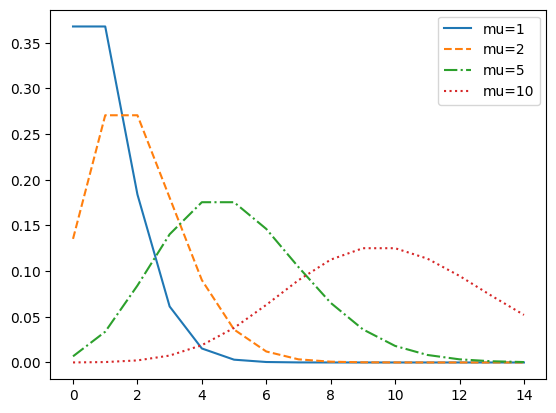

In [22]:
bins=range(0,15)
ls = ['-','--','-.',':']
for i,mu in enumerate([1,2,5,10]):
  y = poisson.pmf(mu=mu,k=bins)
  plt.plot(bins,y,linestyle=ls[i],label=f'mu={mu}')
plt.legend()
plt.show()

- 누적 확률 분포

2022년 기준으로 한 시간 평균 신생아 수는 682명이라고 한다.

한 시간에 650명 이하의 신생아를 낳을 확률을 구하시오.



In [62]:
s=0
for i in range(650+1):
  s += poisson.pmf(mu=682,k=i)
print(s)

0.11328673711428999


In [79]:
p = poisson.cdf(mu=682,k=650)
print(p)

0.11328673711427531


하루에 630명 미만의 신생아를 낳을 확률을 구하시오.

In [80]:
p = poisson.cdf(mu=682,k=629)
print(p)

0.021151977250851533


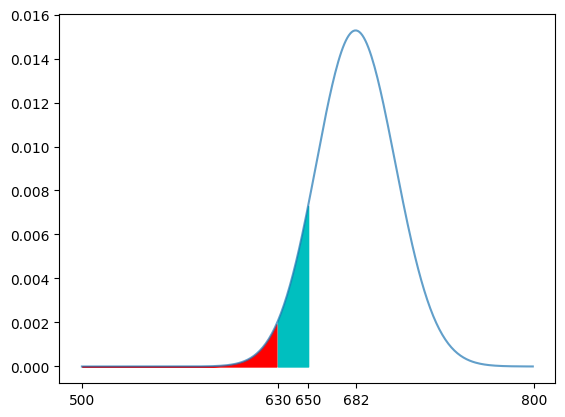

In [66]:
x=range(500,800)
y = poisson.pmf(mu=682,k=x)
plt.plot(x,y,alpha=0.7,label='pmf')

x2 = range(500,630)
y2 = poisson.pmf(mu=682,k=x2)
plt.fill_between(x2,y2,color='r',label='x<630') #630명 미만일 때 확률(면적)

x3 = range(630,651)
y3 = poisson.pmf(mu=682,k=x3)
plt.fill_between(x3,y3,color='c',label='630<x<=651') #630명 이상 650명 이하일 때 확률(면적)
plt.xticks([500,630,650,682,800])
plt.title("")
plt.show()

하루에 700명을 초과하여 신생아를 낳을 확률을 구하시오.

In [71]:
p = 1
for i in range(701):
  p -= poisson.pmf(mu=682,k=i)
print(p)

0.23835961842919245


In [81]:
p = 1 - poisson.cdf(mu=682,k=700)
print(p)

0.23835961842930475


In [82]:
p = poisson.sf(mu=682,k=700)
print(p)

0.23835961842930484


하루에 700명 이상의 신생아를 낳을 확률을 구하시오.

In [83]:
p = 1 - poisson.cdf(mu=682,k=699)
print(p)

0.2502732528118701


In [84]:
p = poisson.sf(mu=682,k=699)
print(p)

0.25027325281187


하루에 n명 이하의 신생아가 낳을 확률은 80%라고 한다. n을 구하시오.

In [86]:
n = poisson.ppf(q=0.8, mu=682)
print(n)

704.0


In [89]:
p1 = poisson.cdf(mu=682,k=703)
print("703명 이하일 확률:",p1)
p2 = poisson.cdf(mu=682,k=704)
print("704명 이하일 확률:",p2)

703명 이하일 확률: 0.7954157446153893
704명 이하일 확률: 0.8059984974302791
